In [43]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score, log_loss

import xgboost
from xgboost import XGBClassifier

xgboost.__version__

'1.7.1'

In [2]:
df = pd.read_csv('https://h2oai-jp-public.s3.ap-northeast-1.amazonaws.com/sample_data/titanic/TitanicData2.csv')
print(df.shape)
df.head(3)

(1309, 15)


,Passenger_Id,pclass,survived,name_with_salutions,name_without_salutions,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home_dest
0,1,3rd,0,"Andersson, Mr. Anders Johan","Andersson, Anders Johan",male,39.0,1,5,347082,31.2750,NaN,Southampton,NaN,"Sweden Winnipeg, MN"
1,2,3rd,1,"McGowan, Miss. Anna ""Annie""","McGowan, Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Queenstown,NaN,NaN
2,3,2nd,1,"Caldwell, Mr. Albert Francis","Caldwell, Albert Francis",male,26.0,1,1,248738,29.0000,NaN,Southampton,13,"Bangkok, Thailand / Roseville, IL"


In [3]:
df.describe()

,Passenger_Id,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.381971,29.881135,0.498854,0.385027,33.295479
std,378.020061,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,328.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
df.describe(include='object')

,pclass,name_with_salutions,name_without_salutions,sex,ticket,cabin,embarked,boat,home_dest
count,1309,1309,1309,1309,1309,295,1307,486,745
unique,3,1307,1307,2,929,186,3,27,369
top,3rd,"Connolly, Miss. Kate","Connolly, Kate",male,CA. 2343,C23 C25 C27,Southampton,13,"New York, NY"
freq,709,2,2,843,11,6,914,39,64


In [5]:
df.isna().sum()

Passenger_Id                 0
pclass                       0
survived                     0
name_with_salutions          0
name_without_salutions       0
sex                          0
age                        263
sibsp                        0
parch                        0
ticket                       0
fare                         1
cabin                     1014
embarked                     2
boat                       823
home_dest                  564
dtype: int64

## scikit-learn API

In [10]:
y = df['survived']
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].copy()

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1309 non-null   object 
 1   sex     1309 non-null   object 
 2   age     1046 non-null   float64
 3   sibsp   1309 non-null   int64  
 4   parch   1309 non-null   int64  
 5   fare    1308 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 61.5+ KB


In [12]:
X.dtypes

pclass     object
sex        object
age       float64
sibsp       int64
parch       int64
fare      float64
dtype: object

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1047, 6), (262, 6), (1047,), (262,))

In [18]:
xgb = XGBClassifier(enable_categorical=True)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [19]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': True,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [20]:
xgb.fit(X_train, y_train)

ValueError: Experimental support for categorical data is not implemented for current tree method yet.

In [51]:
# ラベルエンコード

## Native API

In [21]:
y = df['survived']
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].copy()

In [22]:
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category')

X.dtypes

pclass    category
sex       category
age        float64
sibsp        int64
parch        int64
fare       float64
dtype: object

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1047, 6), (262, 6), (1047,), (262,))

In [28]:
dm_train = xgboost.DMatrix(X_train, label=y_train, enable_categorical=True)

In [29]:
res = xgboost.train(params={}, dtrain=dm_train)
res

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

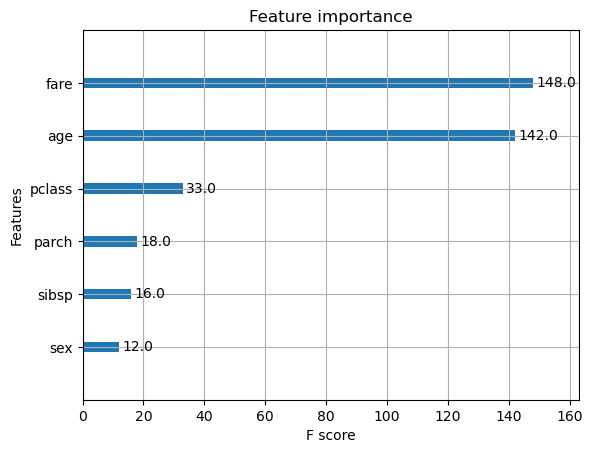

In [30]:
xgboost.plot_importance(res)

In [50]:
pred_train = res.predict(dm_train)
#pred_train

roc_auc_score(y_train, pred_train)

0.9502605227361803

In [49]:
dm_test = xgboost.DMatrix(X_test, label=y_test, enable_categorical=True)

pred_test = res.predict(dm_test)
pred_test

roc_auc_score(y_test, pred_test)

0.8557497467071935